In [18]:
# Read the graph from the edge list file and print the graph

import networkx as nx

# Read the edge list
G = nx.read_edgelist("D:\\Academic\\Master\\ST5225\\com-amazon.ungraph.txt")

# Print the graph
print(G)

Graph with 334863 nodes and 925872 edges


In [2]:
import numpy as np
# Generate samples from a power law distribution
alpha = 1.5  # Power law exponent
num_samples = 20  # Number of samples to generate

# Generate samples using the power law distribution formula
samples = np.random.pareto(alpha - 1, num_samples)

formatted_samples = [f"{sample:.1f}" for sample in samples]
print(", ".join(formatted_samples))

0.1, 4.7, 81.5, 3.3, 0.4, 9.6, 2.5, 0.2, 15.6, 3.7, 0.6, 3.4, 301.9, 4.1, 0.0, 0.0, 268.6, 5.9, 0.0, 4.9


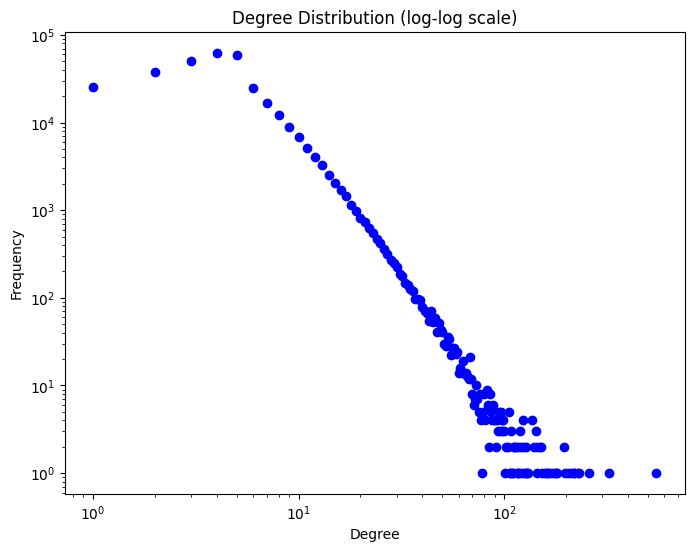

In [3]:
import matplotlib.pyplot as plt

# Calculate the degree histogram
degree_hist = nx.degree_histogram(G)

# Create arrays for degrees and their frequencies
degrees = range(len(degree_hist))
counts = degree_hist

# Plot on a log-log scale
plt.figure(figsize=(8, 6))
plt.scatter(degrees, counts, color='blue', marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution (log-log scale)')
plt.show()

In [4]:
import pandas as pd
from scipy.stats import linregress
import numpy as np

# Create a DataFrame from the degree distribution
df = pd.DataFrame({
    'degree': list(range(len(degree_hist))),
    'frequency': degree_hist
})

# Remove zero values (degrees or frequencies that are zero)
df = df[(df['degree'] > 0) & (df['frequency'] > 0)]

# Log-transform the degree and frequency columns
df['log_degree'] = np.log10(df['degree'])
df['log_frequency'] = np.log10(df['frequency'])

# Perform linear regression on the log-log data
slope, intercept, r_value, p_value, std_err = linregress(df['log_degree'], df['log_frequency'])

print(f"Estimated power law exponent (slope): {-slope:.8f}")
print(f"Intercept: {intercept:.8f}")
print(f"R-squared: {r_value**2:.8f}")

Estimated power law exponent (slope): 2.81376124
Intercept: 6.28349960
R-squared: 0.92999347


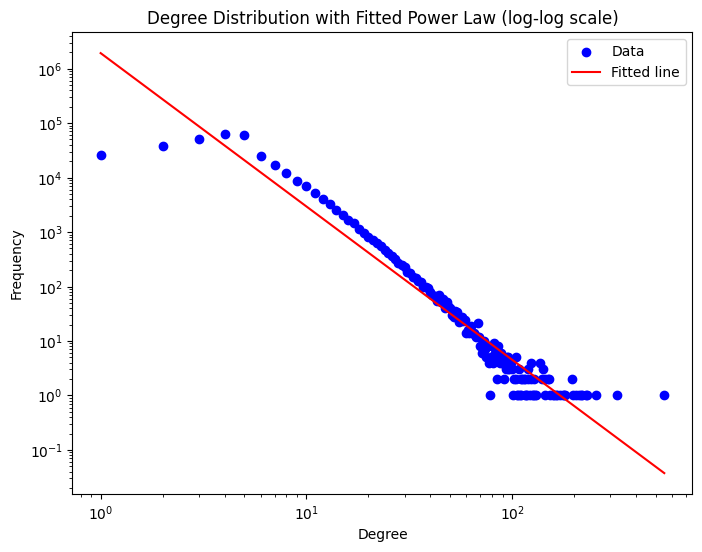

In [5]:
# Scatter plot of degree distribution (log-log)
plt.figure(figsize=(8, 6))
plt.scatter(df['degree'], df['frequency'], color='blue', marker='o', label='Data')
plt.xscale('log')
plt.yscale('log')

# Plot the estimated regression line
log_degrees = np.log10(df['degree'])
fitted_log_freq = slope * log_degrees + intercept
plt.plot(df['degree'], 10**fitted_log_freq, color='red', label='Fitted line')

plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution with Fitted Power Law (log-log scale)')
plt.legend()
plt.show()

In [6]:
from powerlaw import Fit

fit = Fit(df['degree'].repeat(df['frequency']), discrete=True)
ks_statistic, p_value = fit.distribution_compare('power_law', 'lognormal')

print(f"KS statistic (power law vs lognormal): {ks_statistic:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value > 0.05:
    print("The power law is a plausible fit (fail to reject H0).")
else:
    print("The power law is not a good fit (reject H0).")

Calculating best minimal value for power law fit
KS statistic (power law vs lognormal): -8.7592
P-value: 0.0236
The power law is not a good fit (reject H0).


Average shortest path length (from 100 samples): 11.90


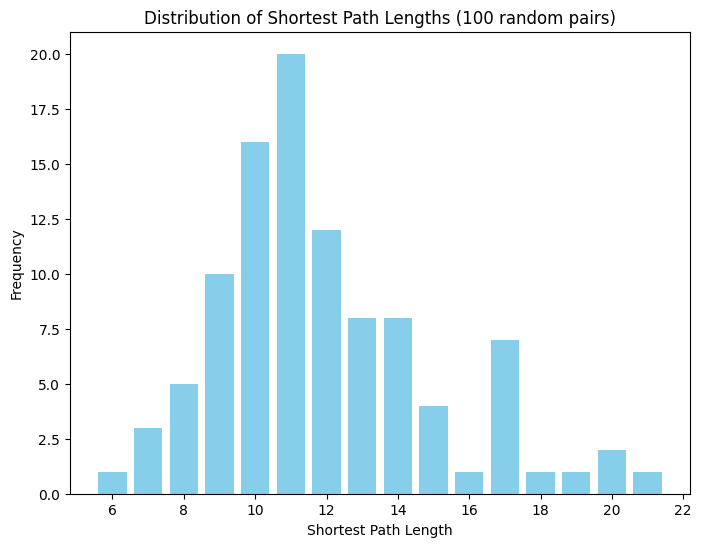

In [7]:
import random
from collections import Counter

# Get the list of nodes
nodes = list(G.nodes())
shortest_paths = []

# Repeat 100 times
for _ in range(100):
    # Randomly pick two distinct nodes
    u, v = random.sample(nodes, 2)
    try:
        # Calculate the shortest path length
        length = nx.shortest_path_length(G, source=u, target=v)
        shortest_paths.append(length)
    except nx.NetworkXNoPath:
        # If no path exists, skip or record as np.nan
        continue

# Calculate the average shortest path length
if shortest_paths:
    avg_length = sum(shortest_paths) / len(shortest_paths)
    print(f"Average shortest path length (from 100 samples): {avg_length:.2f}")
else:
    print("No paths found between sampled pairs.")

# Plot the distribution as a bar plot
path_counts = Counter(shortest_paths)
plt.figure(figsize=(8, 6))
plt.bar(path_counts.keys(), path_counts.values(), color='skyblue')
plt.xlabel('Shortest Path Length')
plt.ylabel('Frequency')
plt.title('Distribution of Shortest Path Lengths (100 random pairs)')
plt.show()

In [20]:
# Extract the giant component (largest connected component) as a subgraph and print it

# Find the largest connected component
giant_component_nodes = max(nx.connected_components(G), key=len)
giant_component = G.subgraph(giant_component_nodes).copy()

# Print the giant component
print(giant_component)

Graph with 334863 nodes and 925872 edges


In [9]:
def estimate_connectivity(G, k=100):
  shortest_paths = []
  connected_count = 0

  node_list = list(G.nodes())

  for _ in range(k):
    # Pick two random nodes
    u, v = np.random.choice(node_list, 2)

    # Check if the nodes are connected
    if nx.has_path(G, u, v):
      connected_count += 1
      shortest_path = nx.shortest_path_length(G, u, v)
      shortest_paths.append(shortest_path)

  # Calculate the probability of connectivity
  connectivity_probability = connected_count / k

  # Calculate the average shortest path length if connected
  if shortest_paths:
    average_shortest_path = np.mean(shortest_paths)
  else:
    average_shortest_path = 0

  return connectivity_probability, average_shortest_path


In [10]:
con_p, avg_sp = estimate_connectivity(giant_component, k=100)
print(f"Connectivity probability for G: {con_p:.4f}")
print(f"Average shortest path length for G: {avg_sp:.4f}")

Connectivity probability for G: 1.0000
Average shortest path length for G: 11.9400


In [11]:
G_removed = G.copy()

# Calculate the number of edges to remove (10%)
num_edges_to_remove = int(0.1 * G_removed.number_of_edges())

# Randomly sample edges to remove
edges_to_remove = random.sample(list(G_removed.edges()), num_edges_to_remove)

# Remove the edges
G_removed.remove_edges_from(edges_to_remove)

giant_component_nodes_removed = max(nx.connected_components(G_removed), key=len)
giant_component_removed = G_removed.subgraph(giant_component_nodes_removed).copy()

# Print the giant component
print(giant_component_removed)

con_p_removed, avg_sp_removed = estimate_connectivity(G_removed, k=100)
print(f"Connectivity probability for G_removed: {con_p_removed:.4f}")
print(f"Average shortest path length for G_removed: {avg_sp_removed:.4f}")

Graph with 328388 nodes and 827743 edges
Connectivity probability for G_removed: 0.9600
Average shortest path length for G_removed: 12.5521


In [21]:
# Calculate additional robustness measures for the graph

# 1. Size of the largest connected component (as a fraction of all nodes)
fraction_largest_cc = len(giant_component) / G.number_of_nodes()
print(f"Fraction of nodes in largest connected component: {fraction_largest_cc:.4f}")

# 2. Number of connected components
num_components = nx.number_connected_components(G)
print(f"Number of connected components: {num_components}")

# 3. Average clustering coefficient
avg_clustering = nx.average_clustering(G)
print(f"Average clustering coefficient: {avg_clustering:.4f}")

# 4. Network diameter (only for the largest connected component)
# if nx.is_connected(G):
#     diameter = nx.diameter(G)
#     print(f"Diameter of largest connected component: {diameter}")
# else:
#     print("Largest component is not connected (unexpected for undirected graphs).")

Fraction of nodes in largest connected component: 1.0000
Number of connected components: 1
Average clustering coefficient: 0.3967


In [22]:
G = nx.read_edgelist("D:\\Academic\\Master\\ST5225\\soc-redditHyperlinks-body.tsv", data=False, create_using=nx.MultiDiGraph())

print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 35778
Number of edges: 286562


c:\Users\YuxinLi\anaconda3\envs\ST5225\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


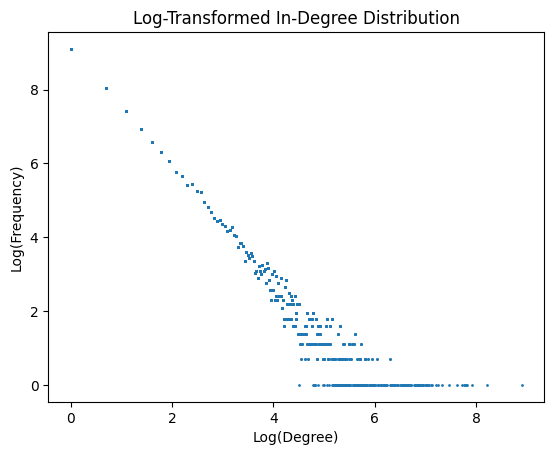

In [13]:
# Calculate the in-degree distribution
in_degrees = dict(G.in_degree())
degree_dist = list(in_degrees.values())

# Create a data frame with the in-degree and frequency
degree_df = pd.DataFrame({'Degree': degree_dist})
degree_df['Frequency'] = degree_df['Degree'].map(degree_df['Degree'].value_counts())

# Plot the in-degree distribution on a log-log scale as a scatter plot
plt.scatter(np.log(degree_df['Degree']), np.log(degree_df['Frequency']), s=1)
plt.xlabel('Log(Degree)')
plt.ylabel('Log(Frequency)')
plt.title('Log-Transformed In-Degree Distribution')
plt.show()

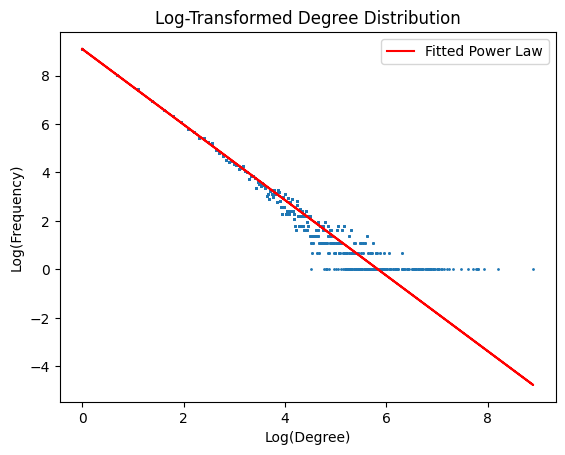

Power Law Exponent: 1.5584432577421292


In [14]:
# Remove degree 0 and degrees with zero frequency
degree_df = degree_df[(degree_df['Degree'] != 0) & (degree_df['Frequency'] != 0)]

# Perform a simple linear regression on the log-transformed degree distribution
x = np.log(degree_df['Degree'])
y = np.log(degree_df['Frequency'])
slope, intercept = np.polyfit(x, y, 1)

# Plot the log-transformed degree distribution and the fitted power law function
plt.scatter(x, y, s=1)
plt.plot(x, slope * x + intercept, color='red', label='Fitted Power Law')
plt.xlabel('Log(Degree)')
plt.ylabel('Log(Frequency)')
plt.title('Log-Transformed Degree Distribution')
plt.legend()
plt.show()

# Print the estimated power law exponent
print('Power Law Exponent:', -slope)

In [23]:
# Extract the strongly connected giant component of G
giant_component = max(nx.strongly_connected_components(G), key=len)
giant_component_graph = G.subgraph(giant_component)
print(giant_component_graph)

# Calculate the connectivity probability and average shortest path length
print("Connectivity and average path length: ", estimate_connectivity(giant_component_graph))

MultiDiGraph with 11564 nodes and 225477 edges
Connectivity and average path length:  (1.0, np.float64(4.06))


In [26]:
# 1. Size of the largest connected component (as a fraction of all nodes)
fraction_largest_cc = len(giant_component) / G.number_of_nodes()
print(f"Fraction of nodes in largest connected component: {fraction_largest_cc:.4f}")

# 2. Number of connected components
# num_components = nx.number_connected_components(G)
# print(f"Number of connected components: {num_components}")

# 3. Average clustering coefficient
# avg_clustering = nx.average_clustering(G)
# print(f"Average clustering coefficient: {avg_clustering:.4f}")

# 4. Network diameter (only for the largest connected component)
# if nx.is_connected(giant_component):
#     diameter = nx.diameter(giant_component)
#     print(f"Diameter of largest connected component: {diameter}")
# else:
#     print("Largest component is not connected (unexpected for undirected graphs).")

Fraction of nodes in largest connected component: 0.3232


Running simulations on Square Lattice...
  Simulating delta = 0.00 (1/21)...
  Simulating delta = 0.05 (2/21)...
  Simulating delta = 0.10 (3/21)...
  Simulating delta = 0.15 (4/21)...
  Simulating delta = 0.20 (5/21)...
  Simulating delta = 0.25 (6/21)...
  Simulating delta = 0.30 (7/21)...
  Simulating delta = 0.35 (8/21)...
  Simulating delta = 0.40 (9/21)...
  Simulating delta = 0.45 (10/21)...
  Simulating delta = 0.50 (11/21)...
  Simulating delta = 0.55 (12/21)...
  Simulating delta = 0.60 (13/21)...
  Simulating delta = 0.65 (14/21)...
  Simulating delta = 0.70 (15/21)...
  Simulating delta = 0.75 (16/21)...
  Simulating delta = 0.80 (17/21)...
  Simulating delta = 0.85 (18/21)...
  Simulating delta = 0.90 (19/21)...
  Simulating delta = 0.95 (20/21)...
  Simulating delta = 1.00 (21/21)...
Lattice simulations complete.


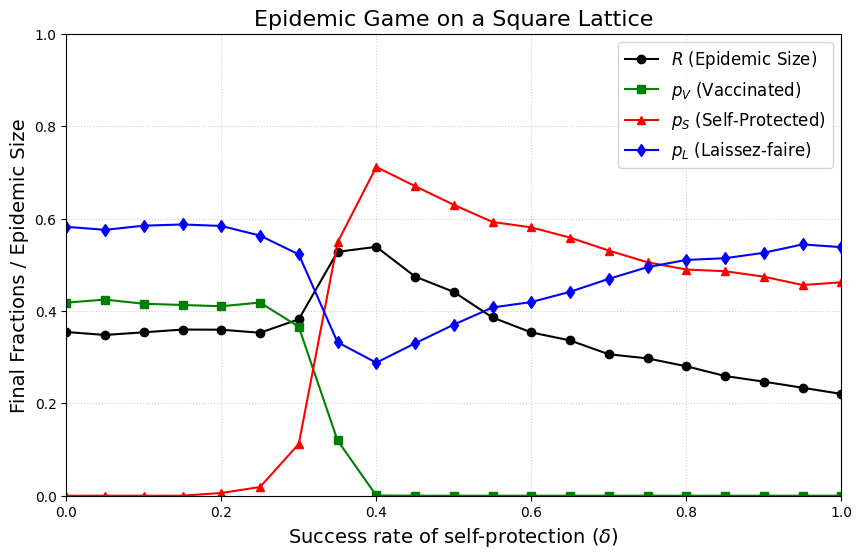

In [27]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from epidemic_game import EpidemicGameSimulator # Import the class from the file

# --- Define the Network ---
# A NxN grid represents a structured population with local interactions.
N_side = 40
G_lattice = nx.grid_2d_graph(N_side, N_side, periodic=True)

# --- Define Parameters from the Paper (Figure 1) ---
params = {
    'lambd': 0.5,  # Transmission probability
    'mu': 0.3,     # Recovery probability
    'b': 0.1,      # Cost of self-protection
    'c': 0.4,      # Cost of vaccination
    'kappa': 10,   # Selection strength
    'I0': 5        # Initial infected
}

# --- Simulation Settings ---
total_seasons = 200
burn_in_seasons = 100
delta_values = np.linspace(0, 1.0, 21) # Range of self-protection effectiveness

# --- Run the Experiment ---
results_lattice = []
print("Running simulations on Square Lattice...")
for i, delta in enumerate(delta_values):
    print(f"  Simulating delta = {delta:.2f} ({i+1}/{len(delta_values)})...")
    simulator = EpidemicGameSimulator(G_lattice, delta=delta, **params)
    avg_result = simulator.run_simulation(seasons=total_seasons, burn_in=burn_in_seasons)
    results_lattice.append(avg_result)
print("Lattice simulations complete.")

# --- Plot the Results ---
R = [r['R'] for r in results_lattice]
pV = [r['pV'] for r in results_lattice]
pS = [r['pS'] for r in results_lattice]
pL = [r['pL'] for r in results_lattice]

plt.figure(figsize=(10, 6))
plt.plot(delta_values, R, 'o-', label=r'$R$ (Epidemic Size)', color='black')
plt.plot(delta_values, pV, 's-', label=r'$p_V$ (Vaccinated)', color='green')
plt.plot(delta_values, pS, '^-', label=r'$p_S$ (Self-Protected)', color='red')
plt.plot(delta_values, pL, 'd-', label=r'$p_L$ (Laissez-faire)', color='blue')
plt.xlabel(r'Success rate of self-protection ($\delta$)', fontsize=14)
plt.ylabel('Final Fractions / Epidemic Size', fontsize=14)
plt.title("Epidemic Game on a Square Lattice", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle=':', alpha=0.6)
plt.ylim(0, 1.0)
plt.xlim(0, 1.0)
plt.show()

Running simulations on an Erdős-Rényi Random Graph...
  Simulating delta = 0.00 (1/21)...
  Simulating delta = 0.05 (2/21)...
  Simulating delta = 0.10 (3/21)...
  Simulating delta = 0.15 (4/21)...
  Simulating delta = 0.20 (5/21)...
  Simulating delta = 0.25 (6/21)...
  Simulating delta = 0.30 (7/21)...
  Simulating delta = 0.35 (8/21)...
  Simulating delta = 0.40 (9/21)...
  Simulating delta = 0.45 (10/21)...
  Simulating delta = 0.50 (11/21)...
  Simulating delta = 0.55 (12/21)...
  Simulating delta = 0.60 (13/21)...
  Simulating delta = 0.65 (14/21)...
  Simulating delta = 0.70 (15/21)...
  Simulating delta = 0.75 (16/21)...
  Simulating delta = 0.80 (17/21)...
  Simulating delta = 0.85 (18/21)...
  Simulating delta = 0.90 (19/21)...
  Simulating delta = 0.95 (20/21)...
  Simulating delta = 1.00 (21/21)...
Lattice simulations complete.


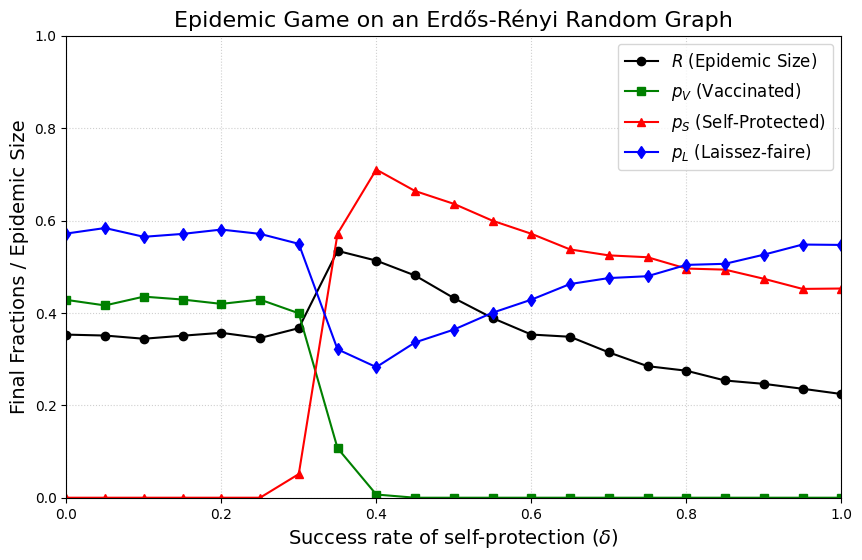

In [28]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from epidemic_game import EpidemicGameSimulator # Import the class from the file

# --- Define the Network ---
# Calculate average degree of G_lattice
average_degree = sum(dict(G_lattice.degree()).values()) / G_lattice.number_of_nodes()
G_random = nx.erdos_renyi_graph(len(G_lattice.nodes()), p= average_degree  / len(G_lattice.nodes())) # Average degree ~4

# --- Run the Experiment ---
results_lattice = []
print("Running simulations on an Erdős-Rényi Random Graph...")
for i, delta in enumerate(delta_values):
    print(f"  Simulating delta = {delta:.2f} ({i+1}/{len(delta_values)})...")
    simulator = EpidemicGameSimulator(G_lattice, delta=delta, **params)
    avg_result = simulator.run_simulation(seasons=total_seasons, burn_in=burn_in_seasons)
    results_lattice.append(avg_result)
print("Lattice simulations complete.")

# --- Plot the Results ---
R = [r['R'] for r in results_lattice]
pV = [r['pV'] for r in results_lattice]
pS = [r['pS'] for r in results_lattice]
pL = [r['pL'] for r in results_lattice]

plt.figure(figsize=(10, 6))
plt.plot(delta_values, R, 'o-', label=r'$R$ (Epidemic Size)', color='black')
plt.plot(delta_values, pV, 's-', label=r'$p_V$ (Vaccinated)', color='green')
plt.plot(delta_values, pS, '^-', label=r'$p_S$ (Self-Protected)', color='red')
plt.plot(delta_values, pL, 'd-', label=r'$p_L$ (Laissez-faire)', color='blue')
plt.xlabel(r'Success rate of self-protection ($\delta$)', fontsize=14)
plt.ylabel('Final Fractions / Epidemic Size', fontsize=14)
plt.title("Epidemic Game on an Erdős-Rényi Random Graph", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle=':', alpha=0.6)
plt.ylim(0, 1.0)
plt.xlim(0, 1.0)
plt.show()

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pareto
import math


def stochastic_round(value):
    """
    Rounds a float to an integer while preserving the expectation.
    e.g., 3.4 is rounded to 3 with 60% prob, and 4 with 40% prob.
    """
    lower_int = math.floor(value)
    upper_int = math.ceil(value)
    if lower_int == upper_int:
        return lower_int

    prob_upper = value - lower_int
    if np.random.rand() < prob_upper:
        return upper_int
    else:
        return lower_int


def simulate_sir_outbreak(R0, transmission_model, alpha=3.0, population_size=10000, initial_infected=30):
    """
    Simulates a step-by-step SIR outbreak in a population.
    """
    states = np.zeros(population_size, dtype=int)
    initial_indices = np.random.choice(population_size, initial_infected, replace=False)
    states[initial_indices] = 1
    history = []

    while True:
        s_count = np.sum(states == 0)
        i_count = np.sum(states == 1)
        r_count = np.sum(states == 2)
        history.append({'S': s_count, 'I': i_count, 'R': r_count})

        if i_count == 0:
            break

        next_states = states.copy()
        next_states[states == 1] = 2  # Recovery

        # Transmission
        infected_indices = np.where(states == 1)[0]  # get the 1-D array of indices

        for idx in infected_indices:
            if transmission_model == 'poisson':
                num_contacts = np.random.poisson(lam=R0)
            elif transmission_model == 'pareto':
                xm = max(1e-9, R0 * (alpha - 1))  # xm must be > 0
                sample = pareto.rvs(b=alpha, scale=xm)
                num_contacts = stochastic_round(sample - xm)
            else:
                raise ValueError("transmission_model must be 'poisson' or 'pareto'")

            if num_contacts > 0:
                target_indices = np.random.choice(population_size, num_contacts, replace=True)
                for target_idx in target_indices:
                    if next_states[target_idx] == 0:
                        next_states[target_idx] = 1

        states = next_states

    return pd.DataFrame(history)

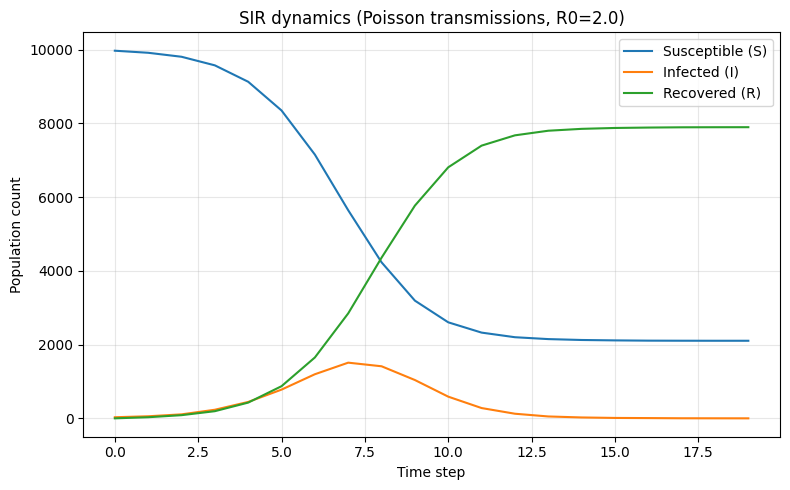

In [30]:
poisson_history = simulate_sir_outbreak(R0=2.0, transmission_model='poisson')

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(poisson_history.index, poisson_history['S'], label='Susceptible (S)')
ax.plot(poisson_history.index, poisson_history['I'], label='Infected (I)')
ax.plot(poisson_history.index, poisson_history['R'], label='Recovered (R)')
ax.set_xlabel('Time step')
ax.set_ylabel('Population count')
ax.set_title('SIR dynamics (Poisson transmissions, R0=2.0)')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

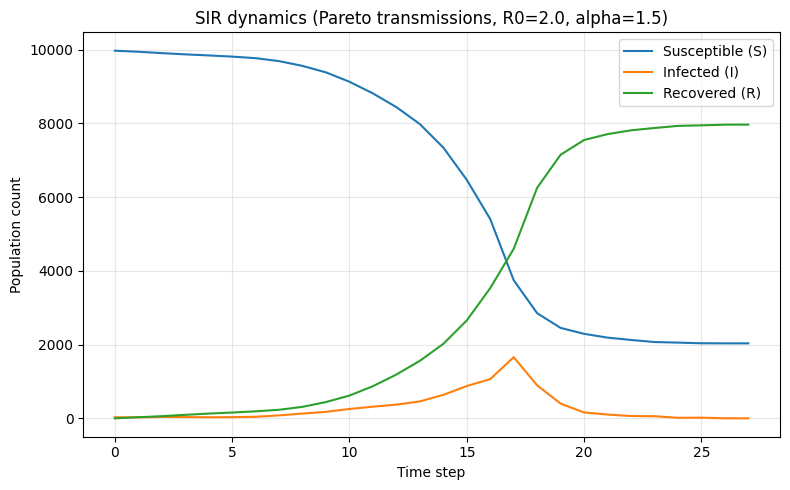

In [31]:
# Simulate SIR outbreak with Pareto transmission and store the history
pareto_history = simulate_sir_outbreak(R0=2.0, transmission_model='pareto', alpha=1.5)

# Visualize S, I, R over time for the Pareto transmission model
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(pareto_history.index, pareto_history['S'], label='Susceptible (S)')
ax.plot(pareto_history.index, pareto_history['I'], label='Infected (I)')
ax.plot(pareto_history.index, pareto_history['R'], label='Recovered (R)')
ax.set_xlabel('Time step')
ax.set_ylabel('Population count')
ax.set_title('SIR dynamics (Pareto transmissions, R0=2.0, alpha=1.5)')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

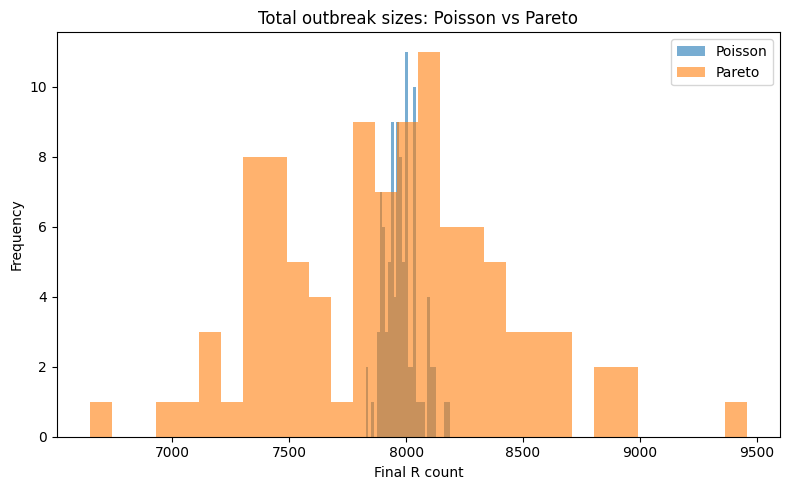

In [32]:
# Run 100 simulations for Poisson and Pareto; collect final outbreak sizes
poisson_totals = []
pareto_totals = []

for _ in range(100):
    ph = simulate_sir_outbreak(R0=2.0, transmission_model='poisson')
    poisson_totals.append(ph['R'].iloc[-1])

    pa = simulate_sir_outbreak(R0=2.0, transmission_model='pareto', alpha=1.5)
    pareto_totals.append(pa['R'].iloc[-1])

# Plot combined histograms (overlayed)
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(poisson_totals, bins=30, color='tab:blue', alpha=0.6, label='Poisson')
ax.hist(pareto_totals, bins=30, color='tab:orange', alpha=0.6, label='Pareto')
ax.set_title('Total outbreak sizes: Poisson vs Pareto')
ax.set_xlabel('Final R count')
ax.set_ylabel('Frequency')
ax.legend()
plt.tight_layout()
plt.show()

In [33]:
import random
import networkx as nx

# Community sizes
sizes = [2000, 2000, 1000]  # total = 5000

# Stochastic Block Model probabilities
p = [
    [0.004, 0.0005, 0.0005],
    [0.0005, 0.001, 0.0005],
    [0.0005, 0.0005, 0.001],
]

# Build the graph (undirected)
G = nx.stochastic_block_model(sizes, p, seed=42)

# Helper: map node id to its community (nodes are assigned sequentially by SBM)
def community_of(node):
    if node < sizes[0]:
        return 0
    elif node < sizes[0] + sizes[1]:
        return 1
    else:
        return 2

# Infection probabilities per community
infection_prob = {0: 0.5, 1: 0.01, 2: 0.01}

# Assign Infection_Status attribute
for u in G.nodes():
    c = community_of(u)
    infected = random.random() < infection_prob[c]
    G.nodes[u]["Infection_Status"] = "Positive" if infected else "Negative"

# Optional: quick sanity prints
print(G.number_of_nodes(), G.number_of_edges())
print(sum(1 for _, d in G.nodes(data=True) if d["Infection_Status"] == "Positive"))

5000 14377
1029


In [34]:
# Compute true infection prevalence and average degree for the entire graph
n = G.number_of_nodes()
m = G.number_of_edges()

positive_count = sum(1 for _, d in G.nodes(data=True) if d.get("Infection_Status") == "Positive")
prevalence_pct = (positive_count / n * 100.0) if n else 0.0

avg_degree = (2.0 * m / n) if n else 0.0

print(f"True infection prevalence: {prevalence_pct:.2f}% ({positive_count}/{n})")
print(f"Average degree: {avg_degree:.2f}")

True infection prevalence: 20.58% (1029/5000)
Average degree: 5.75


In [35]:
# Start with 5 random seeds and sample neighbors for 4 waves; create subgraph of sampled nodes
seeds = random.sample(list(G.nodes()), 5)
sampled = set(seeds)
frontier = set(seeds)
wave_sizes = [len(frontier)]

for _ in range(4):
    next_frontier = set()
    for u in frontier:
        for v in G.neighbors(u):
            if v not in sampled:
                next_frontier.add(v)
    sampled.update(next_frontier)
    frontier = next_frontier
    wave_sizes.append(len(frontier))
    if not frontier:
        break

G_sample = G.subgraph(sampled).copy()

print(f"Seeds (5): {sorted(seeds)[:5]} ...")
print(f"Wave sizes: {wave_sizes}")
print(f"Sampled nodes: {len(sampled)}")
print(f"Sampled edges: {G_sample.number_of_edges()}")

Seeds (5): [456, 743, 2523, 2782, 3923] ...
Wave sizes: [5, 22, 137, 843, 2220]
Sampled nodes: 3227
Sampled edges: 10468


In [36]:
n_s = G_sample.number_of_nodes()
m_s = G_sample.number_of_edges()

positive_count_s = sum(1 for _, d in G_sample.nodes(data=True) if d.get("Infection_Status") == "Positive")
prevalence_s_pct = (positive_count_s / n_s * 100.0) if n_s else 0.0

avg_degree_s = (2.0 * m_s / n_s) if n_s else 0.0

print(f"Sample infection prevalence: {prevalence_s_pct:.2f}% ({positive_count_s}/{n_s})")
print(f"Sample average degree: {avg_degree_s:.2f}")

Sample infection prevalence: 30.34% (979/3227)
Sample average degree: 6.49
